In [1]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation
import matplotlib.pyplot as plt


In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [3]:
batchsize=8

In [4]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)

train_data= train_datagen.flow_from_directory(r'C:\Users\exact\OneDrive\Desktop\minor project\Prepared Data\train',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(r'C:\Users\exact\OneDrive\Desktop\minor project\Prepared Data\train',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 62793 images belonging to 2 classes.
Found 15697 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)


test_data = test_datagen.flow_from_directory(r'C:\Users\exact\OneDrive\Desktop\minor project\Prepared Data\test',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 6408 images belonging to 2 classes.


In [6]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 39, 39, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 39, 39, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 39, 39, 32)   0           ['batch_normalization[0][0]']

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 7, 7, 32)    96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 7, 7, 64)     0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 7, 7, 64)     0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activation_10 (Activation)     (None, 7, 7, 96)     0           ['batch_normalization_10[0][0]'] 
          

                                                                                                  
 conv2d_23 (Conv2D)             (None, 7, 7, 96)     55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 7, 7, 48)    144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 7, 7, 96)    288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_20 (Activation)     (None, 7, 7, 48)     0           ['batch_normalization_20[0][0]'] 
          

 conv2d_34 (Conv2D)             (None, 3, 3, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 3, 3, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 3, 3, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 3, 3, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_normalization_35 (BatchN  (None, 3, 3, 128)   384         ['conv2d_35[0][0]']              
 ormalizat

 activation_44 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 3, 3, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 3, 3, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41 (Conv2D)             (None, 3, 3, 160)    122880      ['mixed4[0][0]']                 
          

 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 3, 3, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 3, 3, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 3, 3, 160)   480         ['conv2d_51[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_66 (Conv2D)             (None, 3, 3, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 3, 3, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 3, 3, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_61 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_61[0][0]'] 
          

                                                                                                  
 batch_normalization_74 (BatchN  (None, 3, 3, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 1, 1, 320)    552960      ['activation_70[0][0]']          
                                                                                                  
 conv2d_75

 activation_82 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 1, 1, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 (Concatenate)         (None, 1, 1, 768)    0           ['activation_78[0][0]',          
          

                                                                                                  
 activation_85 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 1, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 1, 1, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activation_93 (Activation)     (None, 1, 1, 192)    0           ['batch_normalization_93[0][0]'] 
          

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [9]:
checkpoint = ModelCheckpoint(r'C:\Users\exact\OneDrive\Desktop\minor project\models',
                            monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks=[checkpoint,earlystop,learning_rate]

In [11]:
# Keep track of the training loss and accuracy
losses = []
accuracies = []

In [12]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                    epochs=10)

C:\Users\exact\AppData\Local\Temp\ipykernel_14032\669434676.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,


Epoch 1/10
7849/7849 [==============================] - ETA: 0s - loss: 0.2121 - accuracy: 0.9168
Epoch 1: val_loss improved from inf to 0.20602, saving model to C:\Users\exact\OneDrive\Desktop\minor project\models


INFO:tensorflow:Assets written to: C:\Users\exact\OneDrive\Desktop\minor project\models\assets


INFO:tensorflow:Assets written to: C:\Users\exact\OneDrive\Desktop\minor project\models\assets


7849/7849 [==============================] - 503s 64ms/step - loss: 0.2121 - accuracy: 0.9168 - val_loss: 0.2060 - val_accuracy: 0.9067 - lr: 0.0010
Epoch 2/10
7849/7849 [==============================] - ETA: 0s - loss: 0.1839 - accuracy: 0.9286
Epoch 2: val_loss improved from 0.20602 to 0.19109, saving model to C:\Users\exact\OneDrive\Desktop\minor project\models


INFO:tensorflow:Assets written to: C:\Users\exact\OneDrive\Desktop\minor project\models\assets


INFO:tensorflow:Assets written to: C:\Users\exact\OneDrive\Desktop\minor project\models\assets


7849/7849 [==============================] - 514s 65ms/step - loss: 0.1839 - accuracy: 0.9286 - val_loss: 0.1911 - val_accuracy: 0.9217 - lr: 0.0010
Epoch 3/10
7849/7849 [==============================] - ETA: 0s - loss: 0.1716 - accuracy: 0.9344
Epoch 3: val_loss improved from 0.19109 to 0.18834, saving model to C:\Users\exact\OneDrive\Desktop\minor project\models


INFO:tensorflow:Assets written to: C:\Users\exact\OneDrive\Desktop\minor project\models\assets


INFO:tensorflow:Assets written to: C:\Users\exact\OneDrive\Desktop\minor project\models\assets


7849/7849 [==============================] - 715s 91ms/step - loss: 0.1716 - accuracy: 0.9344 - val_loss: 0.1883 - val_accuracy: 0.9242 - lr: 0.0010
Epoch 4/10
7849/7849 [==============================] - ETA: 0s - loss: 0.1693 - accuracy: 0.9334
Epoch 4: val_loss did not improve from 0.18834
7849/7849 [==============================] - 638s 81ms/step - loss: 0.1693 - accuracy: 0.9334 - val_loss: 0.2177 - val_accuracy: 0.9154 - lr: 0.0010
Epoch 5/10
7849/7849 [==============================] - ETA: 0s - loss: 0.1643 - accuracy: 0.9372
Epoch 5: val_loss improved from 0.18834 to 0.18259, saving model to C:\Users\exact\OneDrive\Desktop\minor project\models


INFO:tensorflow:Assets written to: C:\Users\exact\OneDrive\Desktop\minor project\models\assets


INFO:tensorflow:Assets written to: C:\Users\exact\OneDrive\Desktop\minor project\models\assets


7849/7849 [==============================] - 607s 77ms/step - loss: 0.1643 - accuracy: 0.9372 - val_loss: 0.1826 - val_accuracy: 0.9243 - lr: 0.0010
Epoch 6/10
7849/7849 [==============================] - ETA: 0s - loss: 0.1602 - accuracy: 0.9386
Epoch 6: val_loss improved from 0.18259 to 0.17610, saving model to C:\Users\exact\OneDrive\Desktop\minor project\models


INFO:tensorflow:Assets written to: C:\Users\exact\OneDrive\Desktop\minor project\models\assets


INFO:tensorflow:Assets written to: C:\Users\exact\OneDrive\Desktop\minor project\models\assets


7849/7849 [==============================] - 869s 111ms/step - loss: 0.1602 - accuracy: 0.9386 - val_loss: 0.1761 - val_accuracy: 0.9295 - lr: 0.0010
Epoch 7/10
7849/7849 [==============================] - ETA: 0s - loss: 0.1606 - accuracy: 0.9381
Epoch 7: val_loss did not improve from 0.17610
7849/7849 [==============================] - 663s 84ms/step - loss: 0.1606 - accuracy: 0.9381 - val_loss: 0.1913 - val_accuracy: 0.9228 - lr: 0.0010
Epoch 8/10
7849/7849 [==============================] - ETA: 0s - loss: 0.1602 - accuracy: 0.9392
Epoch 8: val_loss did not improve from 0.17610
7849/7849 [==============================] - 636s 81ms/step - loss: 0.1602 - accuracy: 0.9392 - val_loss: 0.2121 - val_accuracy: 0.9133 - lr: 0.0010
Epoch 9/10
7849/7849 [==============================] - ETA: 0s - loss: 0.1560 - accuracy: 0.9401
Epoch 9: val_loss did not improve from 0.17610

Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
7849/7849 [============================

In [24]:
from keras.models import load_model
import numpy as np
model.save('C:/Users/exact/OneDrive/Desktop/minor project/models/trained.h5')
np.save('my_history.npy',history.history)

In [14]:
acc_tr, loss_tr = model.evaluate(train_data)
print(acc_tr)
print(loss_tr)

7850/7850 [==============================] - 481s 61ms/step - loss: 0.1275 - accuracy: 0.9516
0.12751024961471558
0.9516028761863708


In [25]:
from keras.models import load_model
trained_model=load_model('C:/Users/exact/OneDrive/Desktop/minor project/models/trained.h5')

In [16]:
acc_tr, loss_tr = trained_model.evaluate(train_data)
print(acc_tr)
print(loss_tr)

7850/7850 [==============================] - 467s 59ms/step - loss: 0.1280 - accuracy: 0.9518
0.12796619534492493
0.9517939686775208


In [17]:
acc_vr, loss_vr = model.evaluate(validation_data)
print(acc_vr)
print(loss_vr)

1963/1963 [==============================] - 92s 47ms/step - loss: 0.1962 - accuracy: 0.9200
0.19623564183712006
0.9200484156608582


In [18]:
acc_test, loss_test = model.evaluate(test_data)
print(acc_tr)
print(loss_tr)

801/801 [==============================] - 38s 47ms/step - loss: 0.3528 - accuracy: 0.8864
0.12796619534492493
0.9517939686775208


In [26]:
model.save('model.h5')


In [27]:
from keras.models import load_model
trained_model=load_model('C:/Users/exact/OneDrive/Desktop/minor project/models/trained.h5')


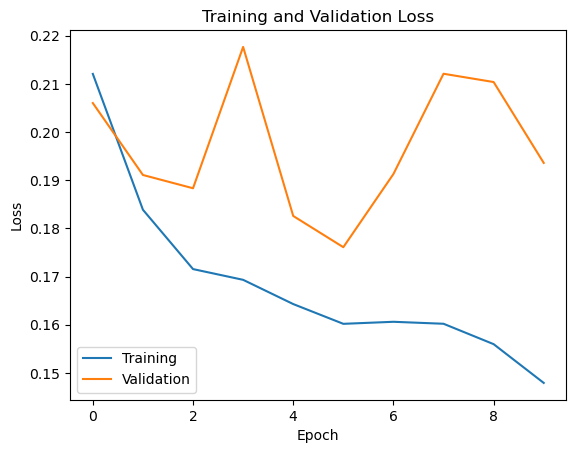

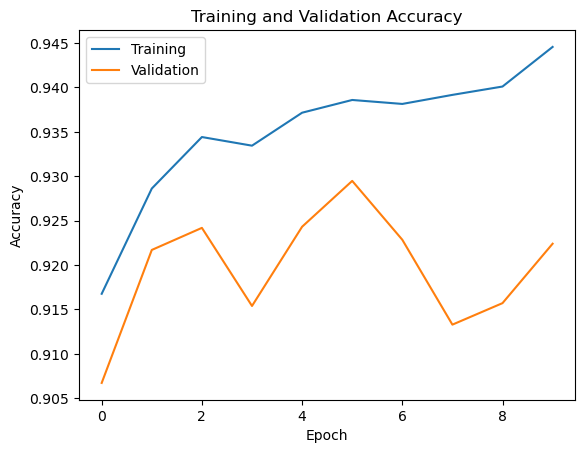

In [21]:
# Plot the training loss and accuracy
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])


plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])


plt.show()

In [22]:
myhistory=np.load('my_history.npy', allow_pickle='TRUE').item()

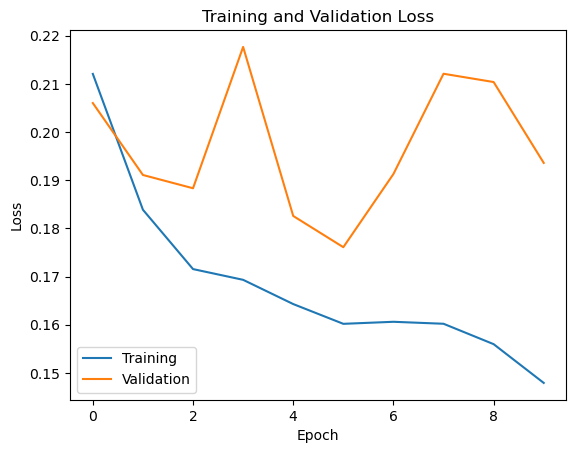

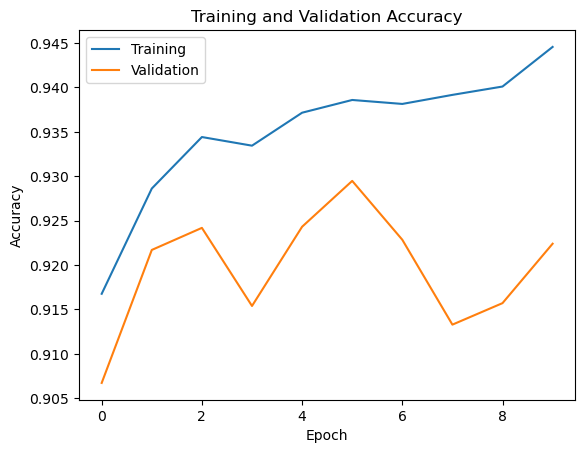

In [23]:
# Plot the training loss and accuracy
plt.figure(1)
plt.plot(myhistory['loss'])
plt.plot(myhistory['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])


plt.figure(2)
plt.plot(myhistory['accuracy'])
plt.plot(myhistory['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])


plt.show()